## Специализированные программные библиотеки для анализа данных.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/My Drive/Classroom/Методы машинного обучения/DA_ML_20')

### Импортируем необходимые модули 

In [ ]:
import numpy as np
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#sns.set()
# с помощью этой строки мы можем включать в этот документ графики:
%matplotlib inline 

##### Разминка

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import *

## Загрузите игрушечный набор -- ирисы
#iris = load_iris()
X = iris.data
y = iris.target
## создадим датафрейм
X = pd.DataFrame(iris.data.T, index = iris.feature_names).T

In [ ]:
target_names = iris.target_names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
---


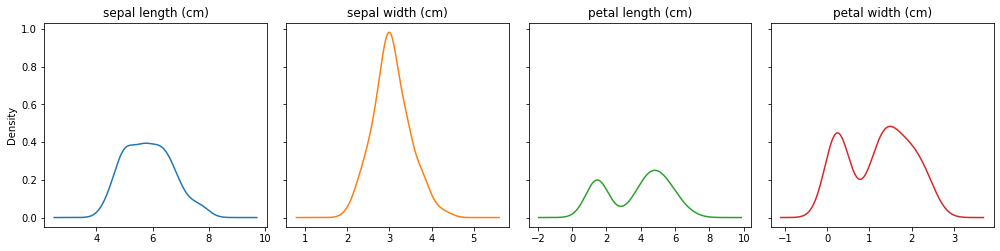

In [ ]:
## посмотрите на ваши данные
print(X.info())
print('---')
print(X.head())
print('---')

## изобразите распределение значений параметров вашего набора
_ = X.iloc[:,:].plot(kind='kde', subplots=True, layout=(4,4), sharex=False, 
                         sharey=True, figsize=[14,13], legend = False,
                         title = X.columns.values.tolist()[:])
plt.tight_layout();

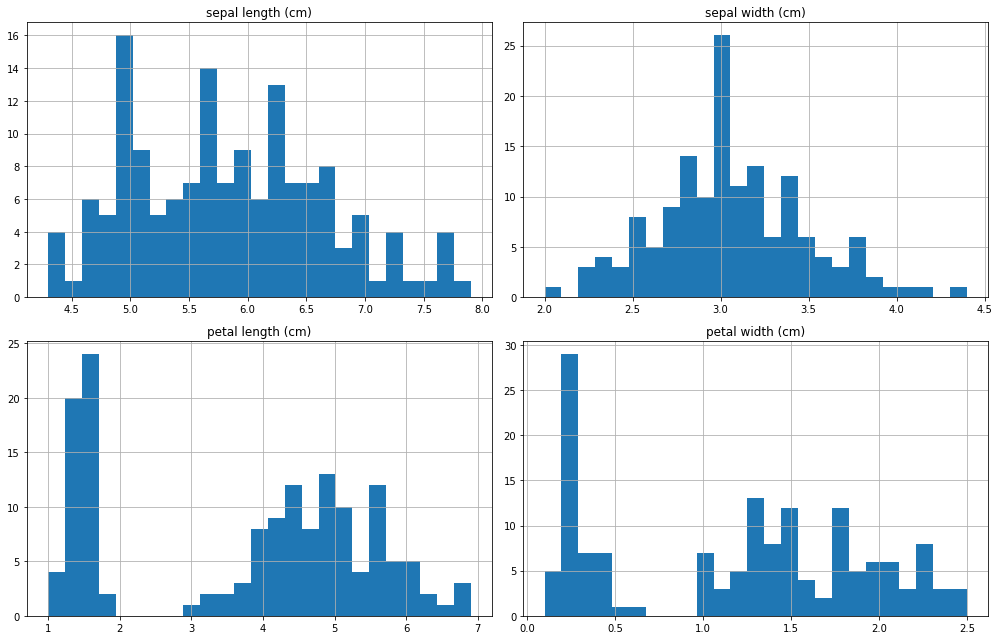

In [ ]:
_ = X.hist(figsize=(14, 9), bins=25)
plt.tight_layout();

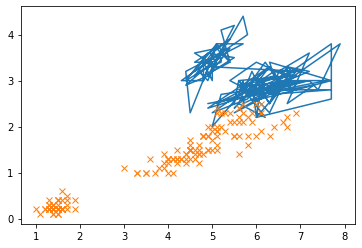

In [ ]:
#На это можно не смотреть, я просто баловался ## OK
plt.plot(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], X.iloc[:,3], 'x')
# plt.axis('equal')
plt.show()

##### Визуализация результатов PCA

In [ ]:
X = iris.data

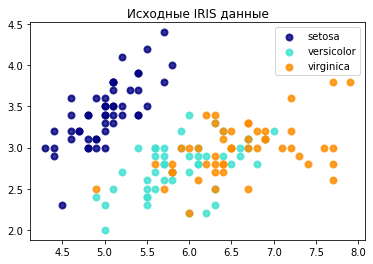

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names): 
  plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw, 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints = 1 ) 
plt.title('Исходные IRIS данные')
plt.show(); 

In [ ]:
## проведите анализ PCA

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

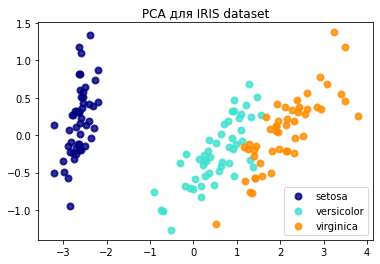

In [ ]:
## постройте диаграмму рассеяния в координатах PC1, PC2
## цвет точек должен соответствовать целевой переменной - y - один из 3 видов
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA для IRIS dataset')
plt.show();

In [ ]:
## постройте биплот, отражающий влияние исходных параметров на PC1 и PC2  
tmp = pd.concat([pd.Series(y), pd.DataFrame(pca.fit(X).transform(X))], axis=1)

In [ ]:
tmp.columns = ['Класс', 'PC1', 'PC2']
tmp

,Класс,PC1,PC2
0,0,-2.684126,0.319397
1,0,-2.714142,-0.177001
2,0,-2.888991,-0.144949
3,0,-2.745343,-0.318299
4,0,-2.728717,0.326755
...,...,...,...
145,2,1.944110,0.187532
146,2,1.527167,-0.375317
147,2,1.764346,0.078859
148,2,1.900942,0.116628


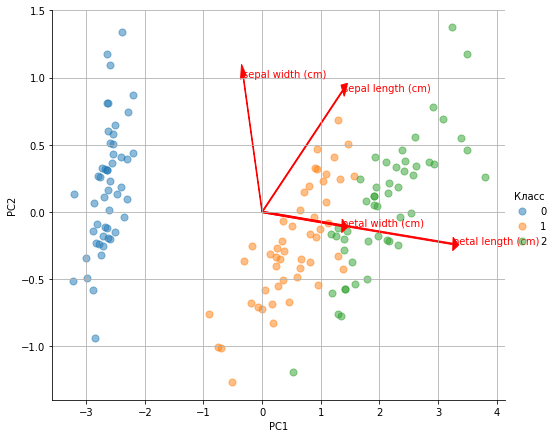

In [ ]:
sns.lmplot(x = 'PC1', y = 'PC2', data=tmp, fit_reg = False, 
           hue = 'Класс', height = 6, aspect = 7/6, scatter_kws={"s": 50, 'alpha':0.5})
 
xvector = pca.components_[0]
yvector = pca.components_[1]
 
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*tmp.PC1.max(), yvector[i]*tmp.PC2.max(),
              color='r', width=0.01, head_width=0.1, head_length = 0.1)
    plt.text(xvector[i]*tmp.PC1.max(), yvector[i]*tmp.PC2.max(),
             list(X.columns.values)[i], color='r')
    
plt.grid()

А теперь попробуем, если данные прошкалируем

In [ ]:
X_scal = StandardScaler().fit_transform(X)

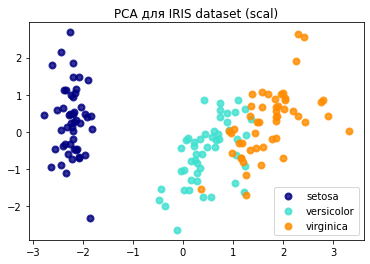

In [ ]:
X_pca_scal = pca.fit(X_scal).transform(X_scal)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca_scal[y == i, 0], X_pca_scal[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA для IRIS dataset (scal)')
plt.show();

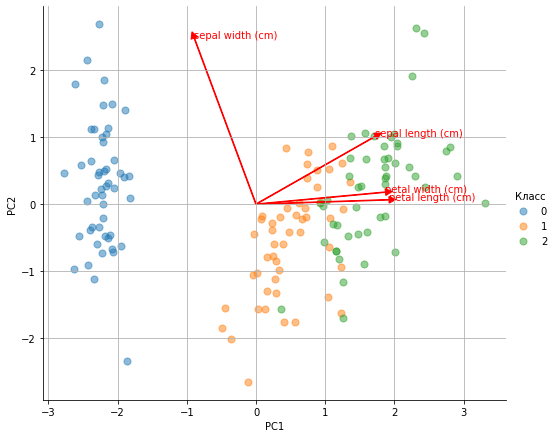

In [ ]:
tmp_2 = pd.concat([pd.Series(y), pd.DataFrame(pca.fit(X_scal).transform(X_scal))], axis=1)
tmp_2.columns = ['Класс', 'PC1', 'PC2']
sns.lmplot(x = 'PC1', y = 'PC2', data=tmp_2, fit_reg = False, 
           hue = 'Класс', height = 6, aspect = 7/6, scatter_kws={"s": 50, 'alpha':0.5})
 
xvector = pca.components_[0]
yvector = pca.components_[1]
 
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*tmp_2.PC1.max(), yvector[i]*tmp_2.PC2.max(),
              color='r', width=0.01, head_width=0.1, head_length = 0.1)
    plt.text(xvector[i]*tmp_2.PC1.max(), yvector[i]*tmp_2.PC2.max(),
             list(X.columns.values)[i], color='r')
    
plt.grid()

##### Набор данных -- уже не столь свежая сводка по эпидемиологической обстановке в России

In [ ]:
#ncov_ru_j = # прочитайте данные из файла, который вы создали на прошлом занятии
## В вашей таблице должны быть колонки:
## "Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'
## "Активных на 100К населения"
## "Заражений на 100К населения"
## "Смертей на 100К населения"
## "Заражений за день на 100К населения"
## "Смертей за день на 100К населения"

## Проверьте, что колонка "Дата" относится к типу "datetime64", если нет -- преобразуйте
## В качестве индексов используйте колонки "Регион" и "Дата" 

In [ ]:
ncov_ru_de = pd.read_csv('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021/Никита Алексеевич Нечепаренко - COVID_RU_Ya_descr.csv')
ncov_ru_stat = pd.read_csv('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021/Никита Алексеевич Нечепаренко - COVID_RU_Ya_stat.csv')

In [ ]:
ncov_ru_de.drop('Unnamed: 0', axis = 1, inplace = True)
ncov_ru_stat.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
ncov_ru_j = ncov_ru_de.join(ncov_ru_stat.set_index('Регион'), on = 'Регион')
ncov_ru_j.fillna(0, inplace = True)
ncov_ru_j.loc[:, 'Дата'] = pd.to_datetime(ncov_ru_j['Дата'] , format = '%d.%m.%Y')
ncov_ru_j.set_index(['Регион','Дата'], inplace = True)

Добавим необходимые столбцы (копипаста с прошлой лаборатной работы)

In [ ]:
ncov_ru_j['Активных'] = ncov_ru_j['Заражений'] - ncov_ru_j['Выздоровлений'] - ncov_ru_j['Смертей'] 
#"Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'

In [ ]:
ncov_ru_j['Активных на 100К населения'] = (ncov_ru_j['Активных'] / ncov_ru_j['Регион население']) * 100000
#"Активных на 100К населения"

In [ ]:
ncov_ru_j['Заражений на 100К населения'] = (ncov_ru_j['Заражений'] / ncov_ru_j['Регион население']) * 100000
#"Заражений на 100К населения"

In [ ]:
ncov_ru_j['Смертей на 100К населения'] = (ncov_ru_j['Смертей'] / ncov_ru_j['Регион население']) * 100000
#"Смертей на 100К населения"

In [ ]:
ncov_ru_j['Заражений за день на 100К населения'] = (ncov_ru_j['Заражений за день'] / ncov_ru_j['Регион население']) * 100000
#"Заражений за день на 100К населения"

In [ ]:
ncov_ru_j['Смертей за день на 100К населения '] = (ncov_ru_j['Смертей за день'] / ncov_ru_j['Регион население']) * 100000
#"Смертей за день на 100К населения"

In [ ]:
ncov_ru_j.sort_index()

ФО  ... Смертей за день на 100К населения 
Регион           Дата                                       ...                                   
Адыгея           2020-03-12        Южный федеральный округ  ...                           0.000000
                 2020-03-13        Южный федеральный округ  ...                           0.000000
                 2020-03-14        Южный федеральный округ  ...                           0.000000
                 2020-03-15        Южный федеральный округ  ...                           0.000000
                 2020-03-16        Южный федеральный округ  ...                           0.000000
...                                                    ...  ...                                ...
Ярославская обл. 2020-11-04  Центральный федеральный округ  ...                           0.079009
                 2020-11-05  Центральный федеральный округ  ...                           0.158017
                 2020-11-06  Центральный федеральный округ  ...                           0.000000
                 2020-11-07  Центральный федеральный округ  ...                           0.000000
                 2020-11-08  Центральный федеральный округ  ...                           0.000000

[20523 rows x 16 columns]

## определите прирост числа заражений в процентах за неделю -- как вы это сделаете вопрос
## если не получится -- просто постройте графики среднего числа активных случаев 
## на 100 тыс. населения со скользящим окном в 7 дней

In [ ]:
weeks = ncov_ru_j['Заражений'].unstack().fillna(0).T

In [ ]:
weeks.index.weekday[0:7] #начинаются все записи с четверга 0 - пн, 6 - вскр
# Для вычисления пригодится pct_change() function calculates the percentage change between the current and a prior element.

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64', name='Дата')

In [ ]:
weeks_result = weeks[weeks.index.weekday == 3]
tmp = weeks_result.pct_change().fillna(0)
tmp

In [ ]:
f = lambda x: x * 100 #результат в %

In [ ]:
tmp.loc[:].agg(f) 

Регион,Адыгея,Алтай,Алтайский край,Амурская обл.,Архангельская обл.,Астраханская обл.,Башкортостан,Белгородская обл.,Брянская обл.,Бурятия,Владимирская обл.,Волгоградская обл.,Вологодская обл.,Воронежская обл.,Дагестан,Еврейская АО,Забайкальский край,Ивановская обл.,Ингушетия,Иркутская обл.,Кабардино-Балкария,Калининградская обл.,Калмыкия,Калужская обл.,Камчатский край,Карачаево-Черкессия,Карелия,Кемеровская обл.,Кировская обл.,Коми,Костромская обл.,Краснодарский край,Красноярский край,Крым,Курганская обл.,Курская обл.,Ленинградская обл.,Липецкая обл.,Магаданская обл.,Марий Эл,...,Нижегородская обл.,Новгородская обл.,Новосибирская обл.,Омская обл.,Оренбургская обл.,Орловская обл.,Пензенская обл.,Пермский край,Приморский край,Псковская обл.,Ростовская обл.,Рязанская обл.,Самарская обл.,Санкт-Петербург,Саратовская обл.,Саха (Якутия),Сахалинская обл.,Свердловская обл.,Севастополь,Северная Осетия,Смоленская обл.,Ставропольский край,Тамбовская обл.,Татарстан,Тверская обл.,Томская обл.,Тульская обл.,Тыва,Тюменская обл.,Удмуртия,Ульяновская обл.,ХМАО – Югра,Хабаровский край,Хакасия,Челябинская обл.,Чечня,Чувашия,Чукотский АО,Ямало-Ненецкий АО,Ярославская обл.
Дата,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-19,0.000000,0.000000,0.000000,0.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,0.000000,0.000000,inf,inf,0.000000,0.000000,0.000000,inf,0.000000,inf,0.000000,0.000000,0.000000,inf,inf,inf,0.000000,200.000000,inf,0.000000,0.000000,0.000000,inf,0.000000,0.000000,0.000000,...,inf,0.000000,inf,0.000000,inf,0.000000,inf,inf,0.000000,0.000000,0.000000,inf,inf,900.000000,inf,inf,0.000000,inf,0.000000,0.000000,0.000000,0.000000,inf,inf,inf,inf,inf,0.000000,inf,0.000000,0.000000,inf,inf,inf,0.000000,0.000000,inf,0.000000,0.000000,inf
2020-03-26,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,inf,0.000000,inf,inf,0.000000,inf,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,60.000000,0.000000,100.000000,0.000000,0.000000,0.000000,50.000000,133.333333,200.000000,0.000000,200.000000,100.000000,inf,inf,0.000000,200.000000,66.666667,0.000000,0.000000,...,166.666667,inf,150.000000,0.000000,300.000000,inf,100.000000,233.333333,inf,inf,inf,100.000000,140.000000,160.000000,0.000000,1300.000000,0.000000,233.333333,0.000000,0.000000,0.000000,inf,0.000000,900.000000,0.000000,100.000000,133.333333,0.000000,50.000000,inf,inf,300.000000,66.666667,100.000000,inf,inf,0.000000,0.000000,0.000000,0.000000
2020-04-02,inf,0.000000,inf,inf,133.333333,inf,150.000000,500.000000,150.000000,1400.000000,inf,700.000000,inf,100.000000,inf,0.000000,0.000000,1000.000000,0.000000,inf,100.000000,137.500000,inf,150.000000,0.000000,0.000000,0.000000,0.000000,71.428571,1766.666667,inf,144.444444,212.500000,128.571429,0.000000,inf,933.333333,200.000000,inf,inf,...,212.500000,200.000000,100.000000,inf,200.000000,50.000000,700.000000,100.000000,150.000000,50.000000,800.000000,150.000000,41.666667,465.384615,1400.000000,7.142857,inf,90.000000,inf,inf,inf,120.000000,100.000000,90.000000,66.666667,50.000000,142.857143,0.000000,100.000000,100.000000,0.000000,100.000000,80.000000,50.000000,320.000000,900.000000,0.000000,0.000000,inf,200.000000

## Постройте график изменения прироста числа заражений начиная с сентября
## с помощью sns.lineplot  
## создаете figure и axes, задаете размер фигуры и разрешение:

In [ ]:
regs = ['Карелия', 'Санкт-Петербург', 'Москва', 'Мурманская обл.']

In [ ]:
weeks = ncov_ru_j['Заражений'].unstack().fillna(0).T
infection_RF = weeks.sum(axis=1).pct_change().fillna(0).loc['2020-09-01':].agg(f)

In [ ]:
infection_sub = weeks.pct_change().fillna(0).loc['2020-09-01':,regs].agg(f)

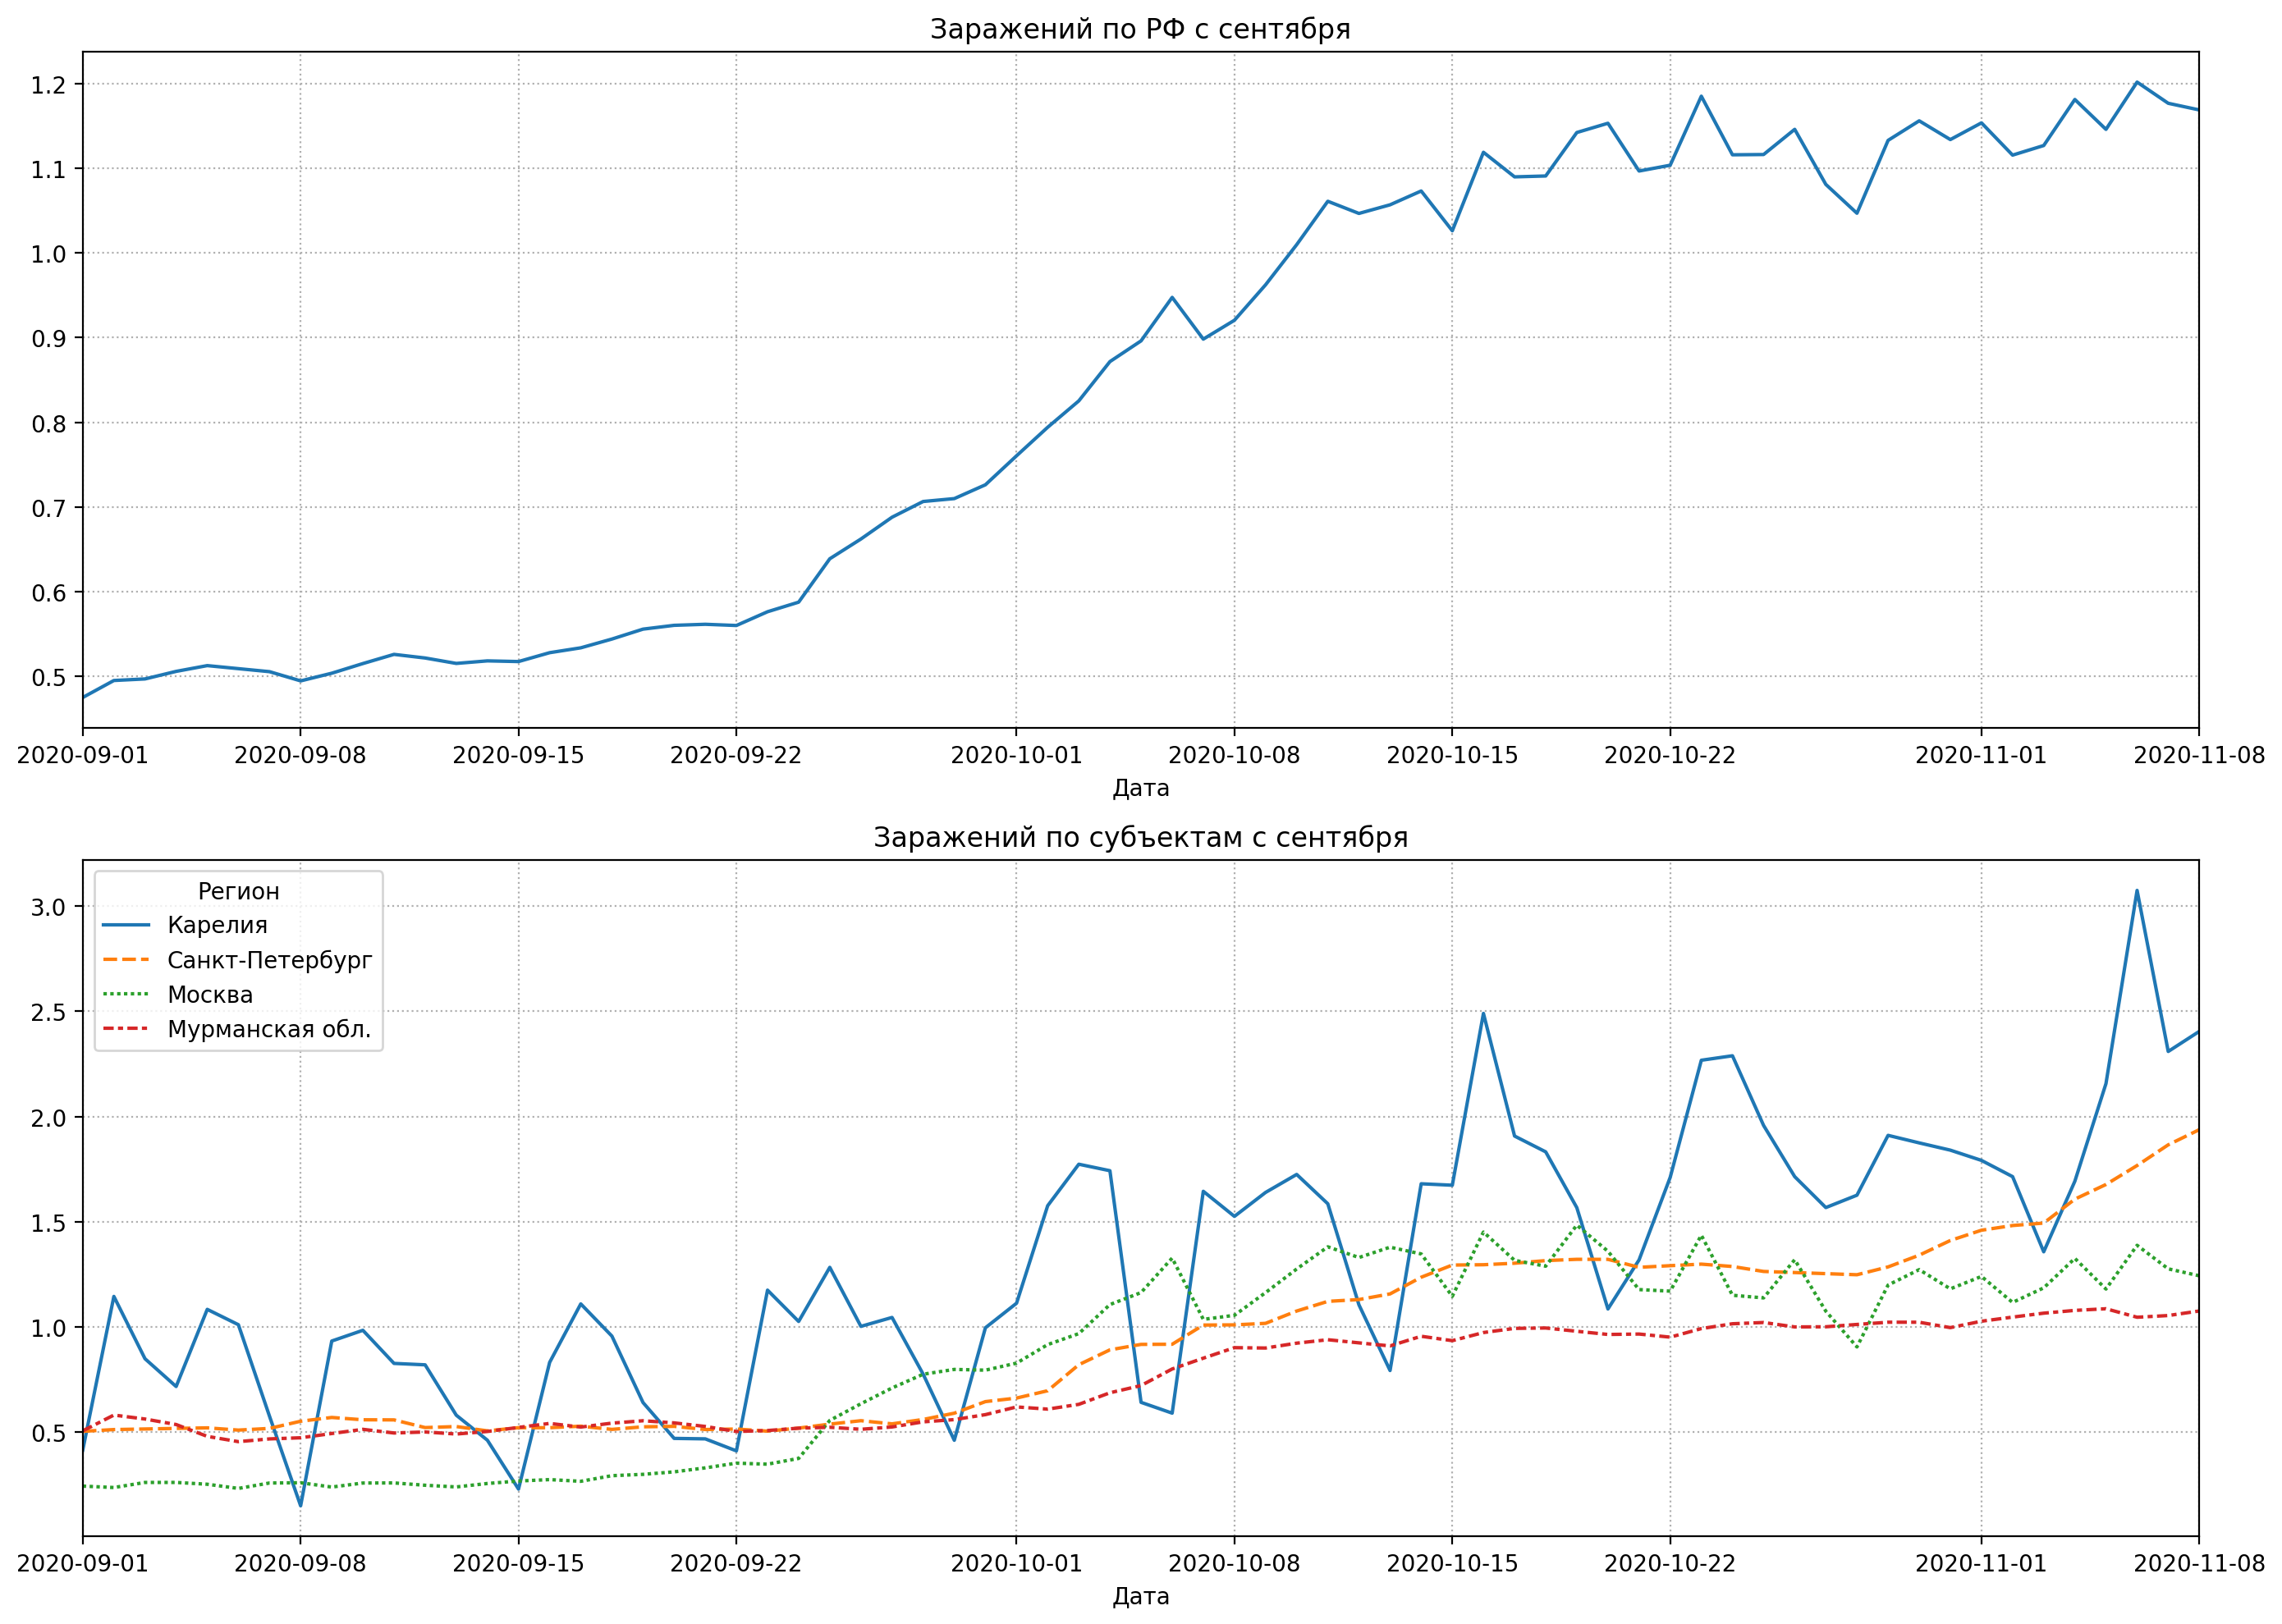

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize = [14, 10], dpi = 200) 
sns.lineplot( data = infection_RF,
              ax = ax1 )
sns.lineplot(data = infection_sub, ax = ax2)
ax1.set_title('Заражений по РФ с сентября')
ax1.grid(ls =':')
ax2.set_title('Заражений по субъектам с сентября')
ax2.grid(ls =':')

ax1.set_xlim([pd.to_datetime('2020-09-01'), infection_RF.index[-1]]);
ax2.set_xlim([pd.to_datetime('2020-09-01'), infection_sub.index[-1]]);
plt.tight_layout()

In [ ]:
weeks = infection_sub.stack().reset_index()
weeks #колонка 0 - прирост заболевших за сутки в %
weeks.rename(columns={0: 'Прирост'}, inplace=True)
weeks

,Дата,Регион,Прирост
0,2020-09-01,Карелия,0.415335
1,2020-09-01,Санкт-Петербург,0.504541
2,2020-09-01,Москва,0.244267
3,2020-09-01,Мурманская обл.,0.506744
4,2020-09-02,Карелия,1.145402
...,...,...,...
271,2020-11-07,Мурманская обл.,1.054523
272,2020-11-08,Карелия,2.404621
273,2020-11-08,Санкт-Петербург,1.937635
274,2020-11-08,Москва,1.243411


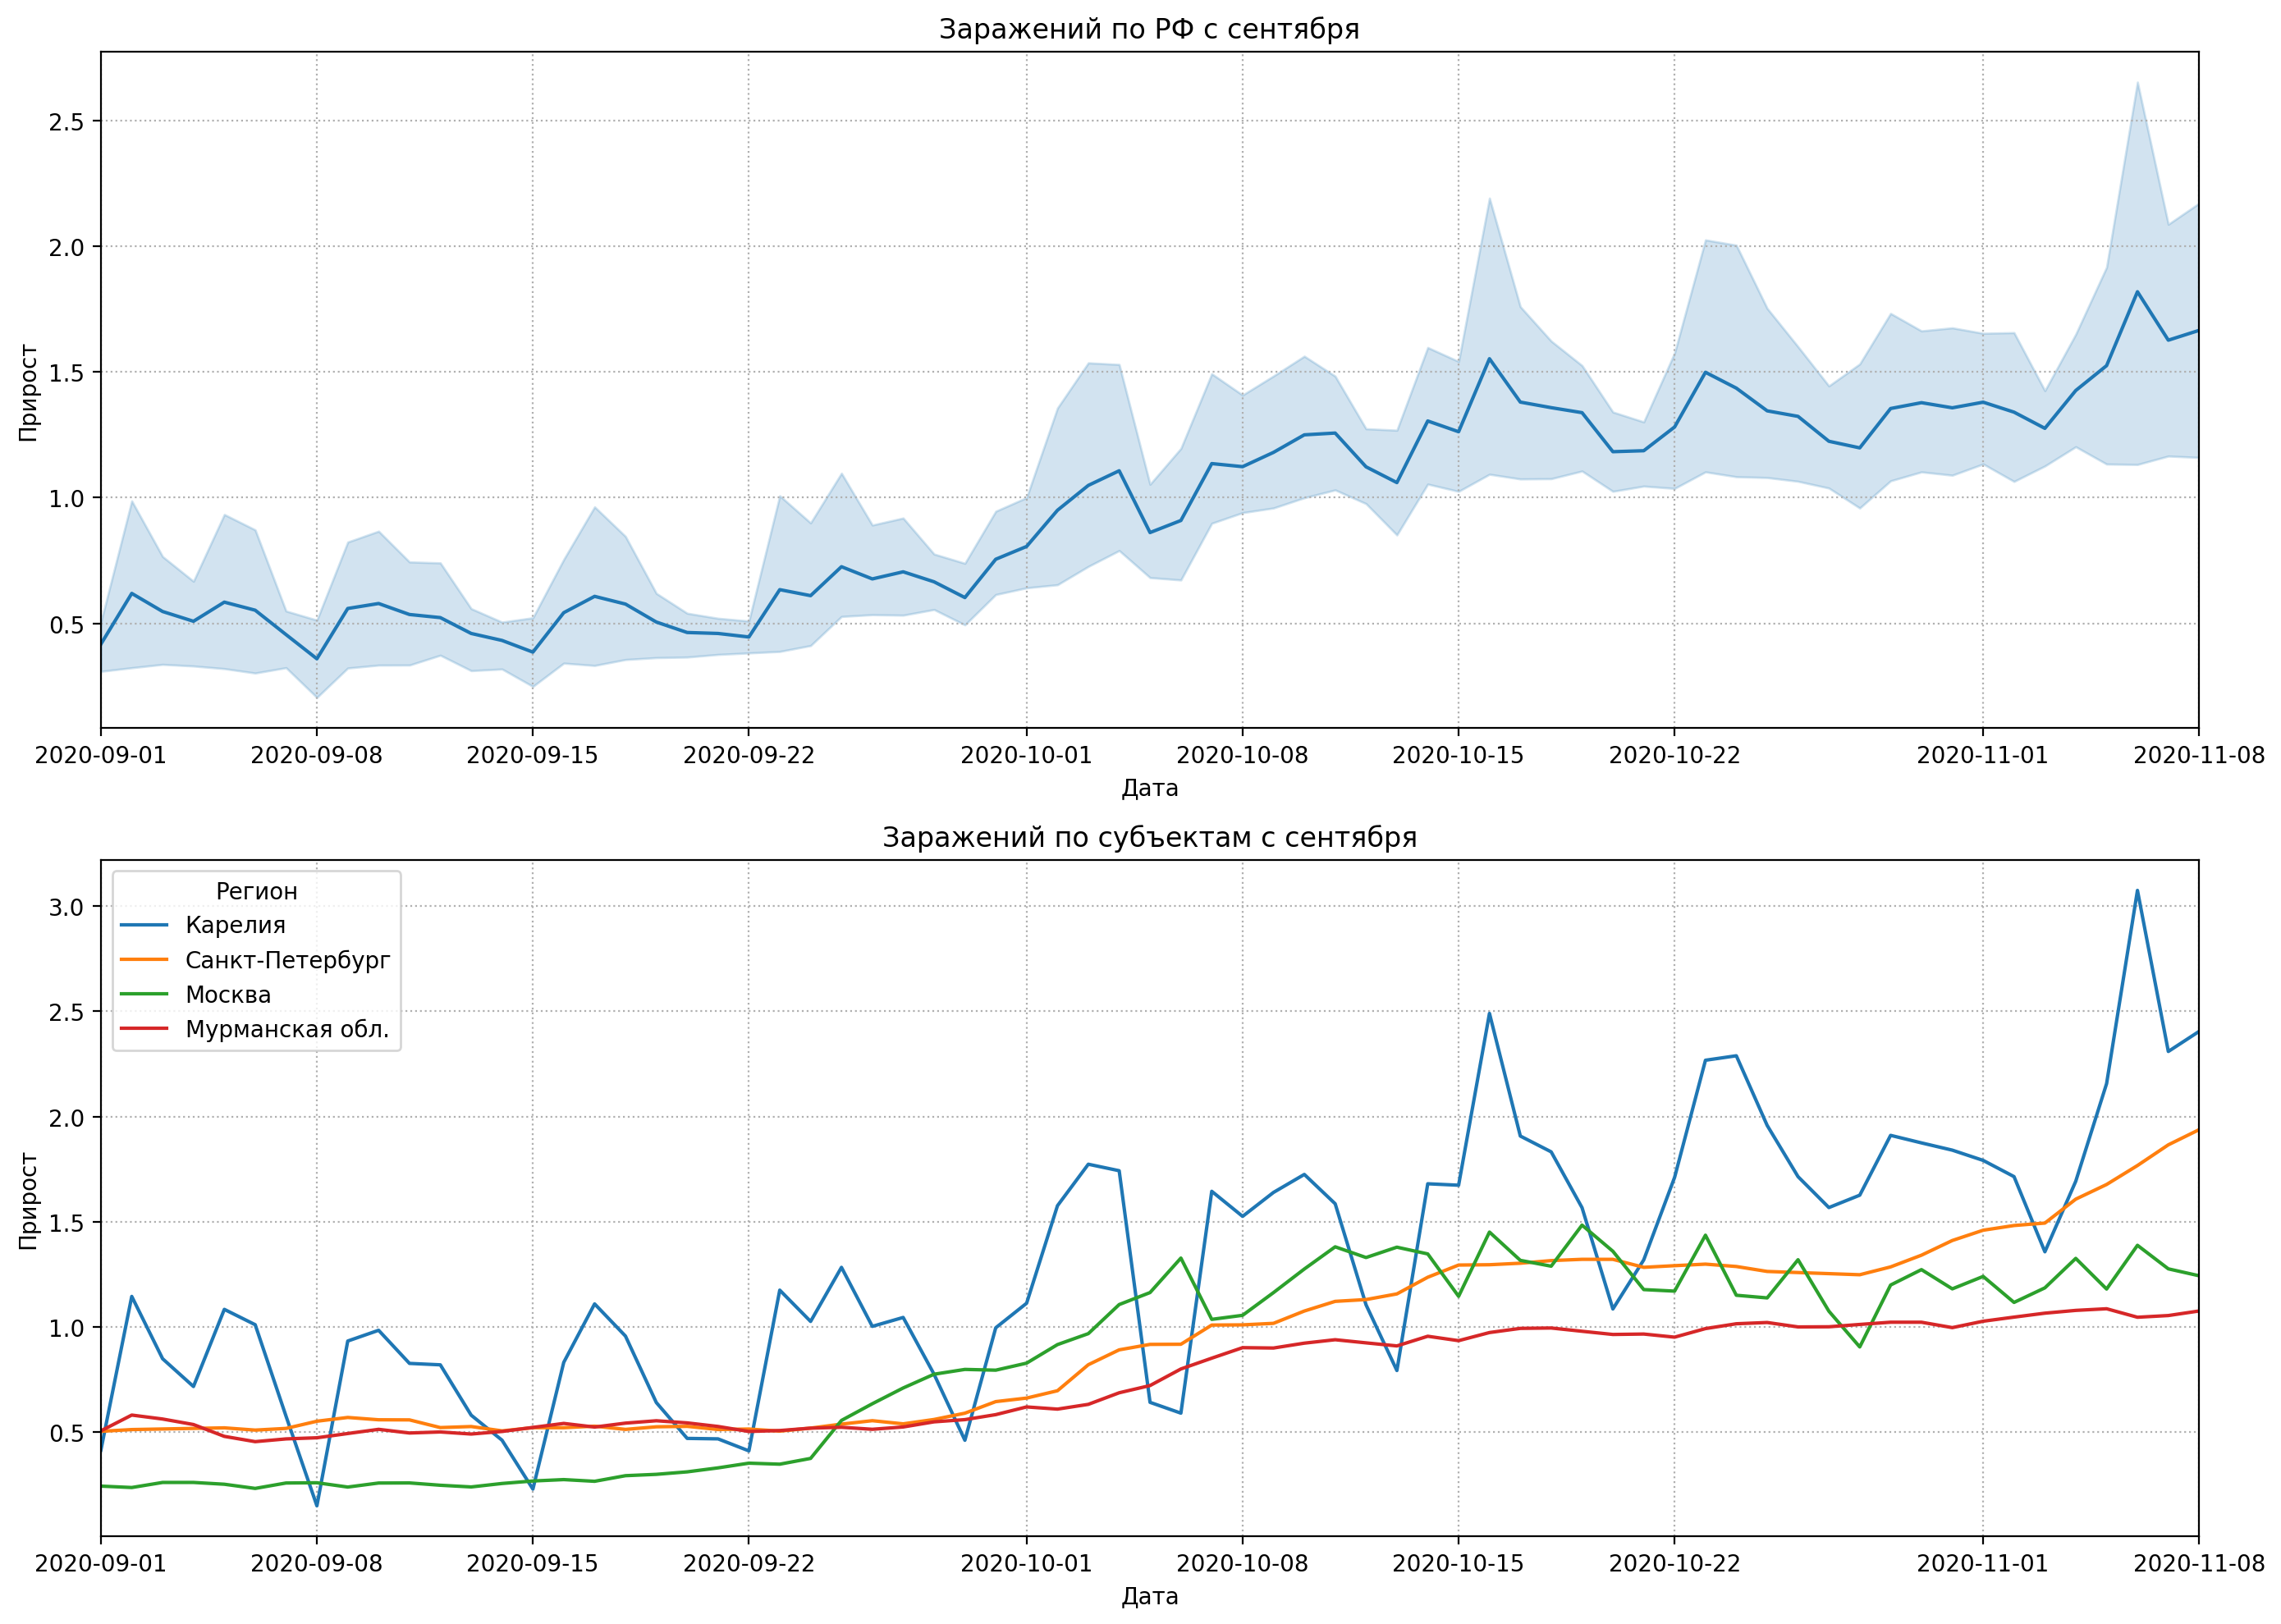

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize = [14, 10], dpi = 200) 
sns.lineplot(data = weeks, x = 'Дата', y = 'Прирост', 
             ax = ax1)
sns.lineplot(data = weeks, ax = ax2, x = 'Дата', y = 'Прирост',
             hue='Регион')
ax1.set_title('Заражений по РФ с сентября')
ax1.grid(ls =':')
ax2.set_title('Заражений по субъектам с сентября')
ax2.grid(ls =':')

ax1.set_xlim([pd.to_datetime('2020-09-01'), infection_RF.index[-1]]);
ax2.set_xlim([pd.to_datetime('2020-09-01'), infection_sub.index[-1]]);
plt.tight_layout()

In [ ]:
import plotly.express as px
fig = px.line(
    weeks,
    x='Дата',
    y='Прирост',
    color='Регион',
    title='Процентный прирост числа заражений начиная с сентября по регионам'
).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.show()

Домашнее задание сдаем в виде ноутбука *.ipynb -- можно расшарить ноутбук в Colab'е.  
Обязательно указываем ФИО  
Вопросы категорически приветствуются.